# Les Bases de Tensorflow en Python

## Importation des packages

In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use('ggplot')

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

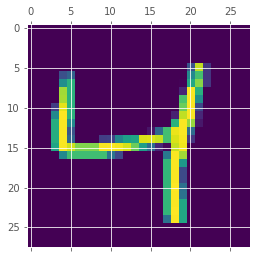

In [6]:
plt.matshow(x_train[2])

In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train_flattened = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test_flattened = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [11]:
x_train.shape[0]==len(x_train)

True

In [12]:
x_train_flattened.shape

(60000, 784)

In [13]:
x_test_flattened.shape

(10000, 784)

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid' )
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4696 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3033 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2832 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9259


In [41]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2677 - accuracy: 0.9264


[0.2677121162414551, 0.9264000058174133]

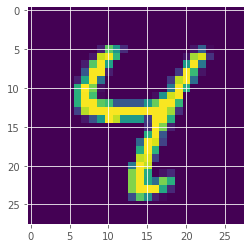

In [29]:
plt.imshow(x_test[6])

In [23]:
y_pred = model.predict(x_test_flattened);

In [30]:
np.argmax(y_pred[6])

4

In [33]:
y_labals = [np.argmax(i) for i in y_pred]

In [35]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_labals)

In [36]:
import seaborn as sns

Text(69.0, 0.5, 'Vraies')

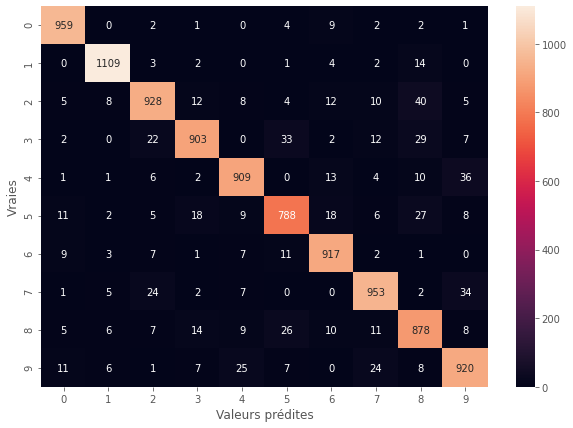

In [39]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Valeurs prédites')
plt.ylabel('Vraies')

In [47]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(x_test_flattened.shape[1], ), activation='relu'),
    keras.layers.Dense(10, input_shape=(x_test_flattened.shape[1], ), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2729 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1221 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0864 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0652 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0512 - accuracy: 0.9845


In [48]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0795 - accuracy: 0.9765


[0.07950843870639801, 0.9764999747276306]

In [51]:
y_pred_labels = [np.argmax(i) for i in model.predict(x_test_flattened)]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

Text(69.0, 0.5, 'Vraies')

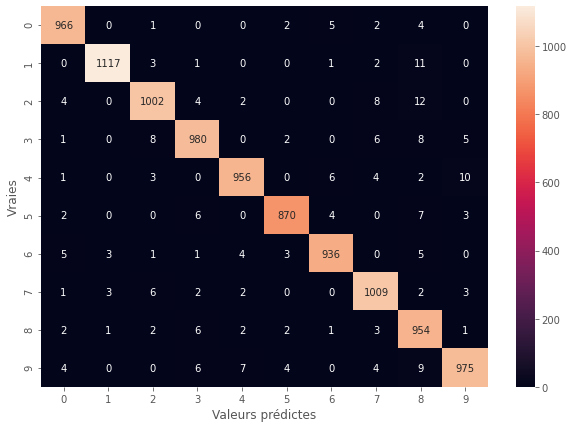

In [52]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Valeurs prédictes')
plt.ylabel('Vraies')